# Fast Neural Style Transfer: Perceptual Losses for Real-Time Style Transfer

## Introduction

Neural style transfer is a technique that allows us to take the content of one image and render it in the style of another image. This explanation focuses on the methodology presented in the paper "Perceptual Losses for Real-Time Style Transfer and Super-Resolution" by Justin Johnson, Alexandre Alahi, and Li Fei-Fei.

## The Two Approaches to Style Transfer

### 1. Gatys' Optimization-Based Method

Leon Gatys et al. introduced the original neural style transfer method, which relies on an optimization process that iteratively updates an image to match both the content of a target image and the style of another image. This method uses a pre-trained convolutional neural network (typically VGG-16) to extract features from the content and style images and then adjusts the generated image to match these features.

**Key characteristics:**
- Uses an iterative optimization framework that requires multiple forward and backward passes through a pre-trained network (usually VGG)
- Generates high-quality stylized images by solving an optimization problem
- Slow process - takes hundreds of iterations to produce satisfactory results, requiring several seconds to minutes per image
- Each new style transfer requires the entire optimization process to be repeated from scratch

### 2. Fast Neural Style Transfer (Johnson et al.'s Method)

Johnson et al.'s fast neural style transfer method trains a feed-forward transformation network to solve the same optimization problem posed by Gatys et al., but does so in a single forward pass. This approach trains a separate convolutional neural network for each style, which then can transform any content image into that style extremely quickly.

**Key characteristics:**
- Uses a feed-forward convolutional neural network specifically trained for each style
- Produces similar qualitative results to Gatys' method but is three orders of magnitude faster (1000x)
- Requires training a separate network for each style, but once trained, can transform any content image in real-time
- Can process images at 20 FPS or more, making it suitable for video applications

## How Fast Neural Style Transfer Works

### 1. Network Architecture

The system consists of two components:

1. **Image Transformation Network**: A deep residual convolutional neural network that transforms input images into stylized output images. This network is what will eventually be used at inference time to create stylized images.

2. **Loss Network**: A pre-trained VGG-16 network that is used to define perceptual loss functions measuring the differences in content and style between images. This network is only used during training.

### 2. Perceptual Loss Functions

Unlike traditional approaches that use per-pixel losses, Johnson's method uses perceptual loss functions based on high-level features extracted from the pre-trained VGG network:

1. **Content/Feature Reconstruction Loss**: Measures the difference between the feature representations of the output image and the content target image. This ensures the transformed image preserves the content of the original image.

2. **Style Reconstruction Loss**: Based on the differences between Gram matrices computed from feature maps at different layers of the VGG network. The Gram matrix captures correlations between different features and represents the "style" of an image.

### 3. Training Process

The image transformation network is trained by minimizing a weighted combination of the content and style losses. For each style, a separate transformation network is trained on a large dataset of content images. 

The training process involves:
1. Feeding content images through the transformation network to get stylized outputs
2. Computing perceptual losses using the loss network (VGG)
3. Updating the transformation network weights to minimize these losses

### 4. Inference (Style Transfer)

Once trained, the transformation network can stylize any new content image in a single forward pass. Since the network is fully convolutional, it can be applied to images of any resolution.

## Key Differences Between Gatys' and Fast Neural Style Transfer

### 1. Speed

The most significant difference is speed. Gatys' method requires hundreds of optimization iterations for each new image, while the fast style transfer approach requires only a single forward pass through the trained network. This results in a speed improvement of approximately 1000x.

Specifically:
- Gatys' method takes seconds to minutes per image
- Fast style transfer processes images in milliseconds (20 FPS at 512×512 resolution)

### 2. Approach

- Gatys: Solves an optimization problem for each new image
- Fast Transfer: Trains a feed-forward network to approximate solutions to the same optimization problem

### 3. Flexibility vs. Efficiency

- Gatys: Can transfer any style to any content image without pre-training, offering more flexibility
- Fast Transfer: Requires training a separate network for each style, but once trained, transfers that style extremely efficiently

### 4. Quality

Johnson et al. report that their method gives similar qualitative results to Gatys' method while being much faster. However:
- There may be some quality differences in certain cases
- Fast transfer can sometimes produce more repetitive patterns

## Implementation Details

Key implementation details of the fast style transfer method include:

1. **Network Architecture**:
   - Follows a residual network design
   - Uses downsampling and upsampling layers instead of pooling
   - Employs instance normalization rather than batch normalization

2. **Loss Network**:
   - Uses VGG-16 pre-trained on ImageNet
   - Content loss is typically computed from middle layers (e.g., relu3_3)
   - Style loss is computed from multiple layers (e.g., relu1_2, relu2_2, relu3_3, relu4_3)

3. **Training**:
   - Trained on large datasets like MS-COCO
   - Uses Adam optimizer
   - Applies total variation regularization to promote spatial smoothness

## Advantages of Fast Neural Style Transfer

1. **Real-time processing**: Three orders of magnitude faster than Gatys' method
2. **Video capability**: Fast enough to process video in real-time
3. **Similar quality**: Produces results qualitatively similar to the original approach
4. **Scalability**: Can process images of arbitrary size due to fully convolutional architecture

## Limitations

1. **Style-specific training**: Requires training a separate network for each style
2. **Training overhead**: Initial training is time-consuming and computationally expensive
3. **Potential quality tradeoffs**: May produce more repetitive patterns or slightly lower quality than optimization-based approaches in some cases

## Conclusion

Fast neural style transfer represents a significant advancement in making artistic style transfer practical for real-time applications. By training feed-forward networks with perceptual loss functions, Johnson et al. achieved comparable quality to Gatys' method while drastically reducing inference time. This approach has enabled style transfer to be used in a variety of applications including mobile apps, video processing, and real-time creative tools.

# Training done on Google Colab

Due to the computationally intensive nature of the training process, we utilized an A100 GPU instance on Google Colab. Training was conducted on a subset of the MS-COCO dataset, comprising approximately 5000 images (around 1 GB). Typically, training took about 15 minutes per model, while inference for the style transfer task executed in under 5 seconds.

To generate diverse artistic styles, we trained individual models on prominent artworks by artists representing major art movements. The artists and their respective movements included:

* Impressionism: Claude Monet, Pierre-Auguste Renoir
* Post-Impressionism: Vincent van Gogh, Paul Gauguin
* Expressionism: Edvard Munch, Wassily Kandinsky (also a pioneer of Abstract Art)
* American Realism: Edward Hopper

Below we show the code for training a model based on Ed Hopper's Nighthawks.


## Training Dataset:

Download the COCO dataset from the link below. The original dataset has about 80,000 images. If training resources are a constraint, good results can be had with a subset as small as 5000 images from the above dataset.

https://cocodataset.org/#home

### Style Image: Nighthawks By Edward Hopper

"Nighthawks," painted by Edward Hopper in 1942, is one of the most iconic works of 20th-century American art.

Description: The painting portrays four figures inside a brightly lit, late-night diner viewed from the dark street outside. A bartender interacts with a man and a woman seated together, while another man sits alone with his back to the viewer. The strong fluorescent lighting contrasts sharply with the dark, deserted street, emphasizing the diner's interior as a contained, almost stage-like space. Despite the figures being together, there's a distinct lack of interaction and a pervasive mood of isolation, loneliness, and quiet contemplation.

Art Movement: "Nighthawks" is a prime example of American Realism. Hopper's work focused on realistic depictions of contemporary American life, often imbued with a sense of unease or alienation.

Artist: Edward Hopper (1882-1967) was a prominent American realist painter. He is best known for his stark, evocative scenes of urban and rural American life, often exploring themes of solitude, isolation, and the passage of time in the modern world.

Significance: The artwork is significant for its masterful capture of a specific mood – the quiet melancholy and disconnection often felt within the modern urban environment. Painted during World War II, it resonated with a sense of national anxiety and introspection. "Nighthawks" has become an enduring symbol of urban isolation and is widely recognized and referenced in popular culture, cementing its place as a masterpiece of American art.


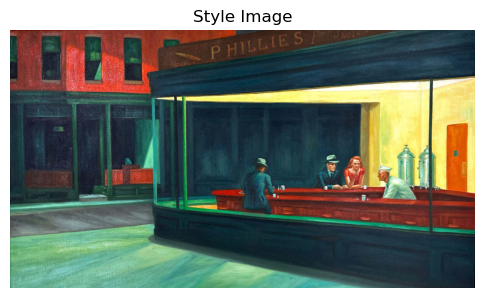

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path, title=None):
    """
    Reads an image from the specified path and displays it in a Jupyter Notebook.

    Parameters:
    - image_path (str): Path to the image file.
    - title (str, optional): Optional title to display above the image.
    """
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        if title:
            plt.title(title)
        plt.show()
    except Exception as e:
        print(f"Error loading image: {e}")
show_image("/Users/amitchaubey/usf/1dl/dl_project/NewMain-Hopper_e5720967-ba7d-46a0-97ad-d365a3b91481.jpg", title="Style Image")

In [ ]:
# --- Step 1: Mount Google Drive ---
# This gives Colab access to your Google Drive so you can save/load models, datasets, and outputs.

from google.colab import drive
drive.mount('/content/drive')

# --- Step 2: Define Directory Paths ---
import os

# REQUIRED: CHANGE THIS if your folder is in a different location on Google Drive.
# This is the base path to the folder where you've uploaded this project's files.
base_dir = '/content/drive/MyDrive/collab_notebooks/fast_transfer_project'

# Define subdirectories relative to the base path
colab_content_dir = os.path.join(base_dir, 'data/content-images')
colab_style_dir = os.path.join(base_dir, 'data/style-images')
colab_model_dir = os.path.join(base_dir, 'data/models')
colab_checkpoint_dir = os.path.join(base_dir, 'data/checkpoints')
colab_output_dir = os.path.join(base_dir, 'output')

# Create necessary directories if they don’t exist
os.makedirs(colab_model_dir, exist_ok=True)
os.makedirs(colab_checkpoint_dir, exist_ok=True)
os.makedirs(colab_output_dir, exist_ok=True)

# Warn if content or style folders are missing
if not os.path.exists(colab_content_dir):
    print(f"Content image folder missing: {colab_content_dir}")
if not os.path.exists(colab_style_dir):
    print(f"Style image folder missing: {colab_style_dir}")

# --- Step 3: Set Torch Device ---
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

Mounted at /content/drive
✅ Using device: cuda


In [ ]:
# Fast Style Transfer Training Script

# This cell contains the architecture, VGG loss model, dataset class, and training function.
# You don't need to change anything here unless you're modifying the network or loss logic.


import os
import time
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models
from collections import namedtuple

# --- Utility Functions ---
def gram_matrix(y):
    (b, ch, h, w) = y.size()
    features = y.view(b, ch, w * h)
    features_t = features.transpose(1, 2)
    return features.bmm(features_t) / (ch * h * w)

def normalize_batch(batch):
    mean = batch.new_tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
    std = batch.new_tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)
    return (batch / 255.0 - mean) / std

def load_image(filename, size=None, scale=None):
    img = Image.open(filename).convert('RGB')
    if size:
        img = img.resize((size, size), Image.Resampling.LANCZOS)
    elif scale:
        img = img.resize((int(img.size[0] / scale), int(img.size[1] / scale)), Image.Resampling.LANCZOS)
    return img

# --- Model Definitions ---
class ConvLayer(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super().__init__()
        padding = kernel_size // 2
        self.reflection_pad = torch.nn.ReflectionPad2d(padding)
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride)

    def forward(self, x):
        return self.conv2d(self.reflection_pad(x))

class ResidualBlock(torch.nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.block = torch.nn.Sequential(
            ConvLayer(channels, channels, kernel_size=3, stride=1),
            torch.nn.InstanceNorm2d(channels, affine=True),
            torch.nn.ReLU(inplace=True),
            ConvLayer(channels, channels, kernel_size=3, stride=1),
            torch.nn.InstanceNorm2d(channels, affine=True),
        )

    def forward(self, x):
        return x + self.block(x)

class UpsampleConvLayer(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, upsample=None):
        super().__init__()
        self.upsample = upsample
        padding = kernel_size // 2
        self.reflection_pad = torch.nn.ReflectionPad2d(padding)
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride)

    def forward(self, x):
        if self.upsample:
            x = torch.nn.functional.interpolate(x, scale_factor=self.upsample, mode='nearest')
        return self.conv2d(self.reflection_pad(x))

class TransformerNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            ConvLayer(3, 32, kernel_size=9, stride=1),
            torch.nn.InstanceNorm2d(32, affine=True),
            torch.nn.ReLU(inplace=True),
            ConvLayer(32, 64, kernel_size=3, stride=2),
            torch.nn.InstanceNorm2d(64, affine=True),
            torch.nn.ReLU(inplace=True),
            ConvLayer(64, 128, kernel_size=3, stride=2),
            torch.nn.InstanceNorm2d(128, affine=True),
            torch.nn.ReLU(inplace=True),
            ResidualBlock(128),
            ResidualBlock(128),
            ResidualBlock(128),
            ResidualBlock(128),
            ResidualBlock(128),
            UpsampleConvLayer(128, 64, kernel_size=3, stride=1, upsample=2),
            torch.nn.InstanceNorm2d(64, affine=True),
            torch.nn.ReLU(inplace=True),
            UpsampleConvLayer(64, 32, kernel_size=3, stride=1, upsample=2),
            torch.nn.InstanceNorm2d(32, affine=True),
            torch.nn.ReLU(inplace=True),
            ConvLayer(32, 3, kernel_size=9, stride=1)
        )

    def forward(self, x):
        return self.model(x)

class Vgg16(torch.nn.Module):
    def __init__(self, requires_grad=False):
        super().__init__()
        vgg_pretrained_features = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).features
        self.slice1 = torch.nn.Sequential(*[vgg_pretrained_features[x] for x in range(4)])
        self.slice2 = torch.nn.Sequential(*[vgg_pretrained_features[x] for x in range(4, 9)])
        self.slice3 = torch.nn.Sequential(*[vgg_pretrained_features[x] for x in range(9, 16)])
        self.slice4 = torch.nn.Sequential(*[vgg_pretrained_features[x] for x in range(16, 23)])

        if not requires_grad:
            for param in self.parameters():
                param.requires_grad = False

    def forward(self, x):
        h = self.slice1(x)
        h_relu1_2 = h
        h = self.slice2(h)
        h_relu2_2 = h
        h = self.slice3(h)
        h_relu3_3 = h
        h = self.slice4(h)
        h_relu4_3 = h
        return namedtuple("VggOutputs", ['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'])(h_relu1_2, h_relu2_2, h_relu3_3, h_relu4_3)

# --- Dataset loader ---
class FlatImageDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir)
                            if f.lower().endswith(('jpg', 'png')) and os.path.isfile(os.path.join(image_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, 0

# --- Training function ---
def train_style_transfer(dataset_path, style_image_path, model_output_path,
                         epochs=10, batch_size=4, image_size=256,
                         content_weight=5e4, style_weight=1e10, lr=1e-3):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])

    train_dataset = FlatImageDataset(dataset_path, transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    transformer = TransformerNet().to(device)
    optimizer = Adam(transformer.parameters(), lr)
    mse_loss = torch.nn.MSELoss()

    vgg = Vgg16(requires_grad=False).to(device)

    # Load and preprocess style image
    style = load_image(style_image_path, size=512)
    style_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    style = style_transform(style)
    style = style.repeat(batch_size, 1, 1, 1).to(device)
    features_style = vgg(normalize_batch(style))
    gram_style = [gram_matrix(y) for y in features_style]

    content_losses = []
    style_losses = []
    total_losses = []

    print("Starting training...")
    for e in range(epochs):
        transformer.train()
        agg_content_loss = 0.
        agg_style_loss = 0.
        count = 0

        for batch_id, (x, _) in enumerate(train_loader):
            n_batch = len(x)
            count += n_batch
            optimizer.zero_grad()

            x = x.to(device)
            y = transformer(x)
            y = normalize_batch(y)
            x = normalize_batch(x)

            features_y = vgg(y)
            features_x = vgg(x)
            content_loss = content_weight * mse_loss(features_y.relu2_2, features_x.relu2_2)

            style_loss = 0.
            for ft_y, gm_s in zip(features_y, gram_style):
                gm_y = gram_matrix(ft_y)
                style_loss += mse_loss(gm_y, gm_s[:n_batch, :, :])
            style_loss *= style_weight

            total_loss = content_loss + style_loss
            total_loss.backward()
            optimizer.step()

            agg_content_loss += content_loss.item()
            agg_style_loss += style_loss.item()

        avg_content = agg_content_loss / len(train_loader)
        avg_style = agg_style_loss / len(train_loader)
        avg_total = avg_content + avg_style

        content_losses.append(avg_content)
        style_losses.append(avg_style)
        total_losses.append(avg_total)

        print(f"Epoch {e+1}/{epochs} - Content: {avg_content:.2f} | Style: {avg_style:.2f} | Total: {avg_total:.2f}")

    # Save model
    torch.save(transformer.state_dict(), model_output_path)
    print(f"Model saved to {model_output_path}")

    return content_losses, style_losses, total_losses

# --- Plotting losses ---
def plot_losses(content_losses, style_losses, total_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(content_losses, label='Content Loss')
    plt.plot(style_losses, label='Style Loss')
    plt.plot(total_losses, label='Total Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 227MB/s]


Starting training...
Epoch 1/10 - Content: 221078.15 | Style: 141543.63 | Total: 362621.78
Epoch 2/10 - Content: 161298.71 | Style: 81686.23 | Total: 242984.94
Epoch 3/10 - Content: 144117.55 | Style: 75877.09 | Total: 219994.65
Epoch 4/10 - Content: 136304.10 | Style: 72111.89 | Total: 208415.99
Epoch 5/10 - Content: 131871.70 | Style: 69376.75 | Total: 201248.44
Epoch 6/10 - Content: 128854.70 | Style: 67414.67 | Total: 196269.36
Epoch 7/10 - Content: 126587.16 | Style: 65751.40 | Total: 192338.56
Epoch 8/10 - Content: 124763.00 | Style: 64562.68 | Total: 189325.68
Epoch 9/10 - Content: 123240.27 | Style: 63502.94 | Total: 186743.21
Epoch 10/10 - Content: 122129.79 | Style: 62663.82 | Total: 184793.61
Model saved to /content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth


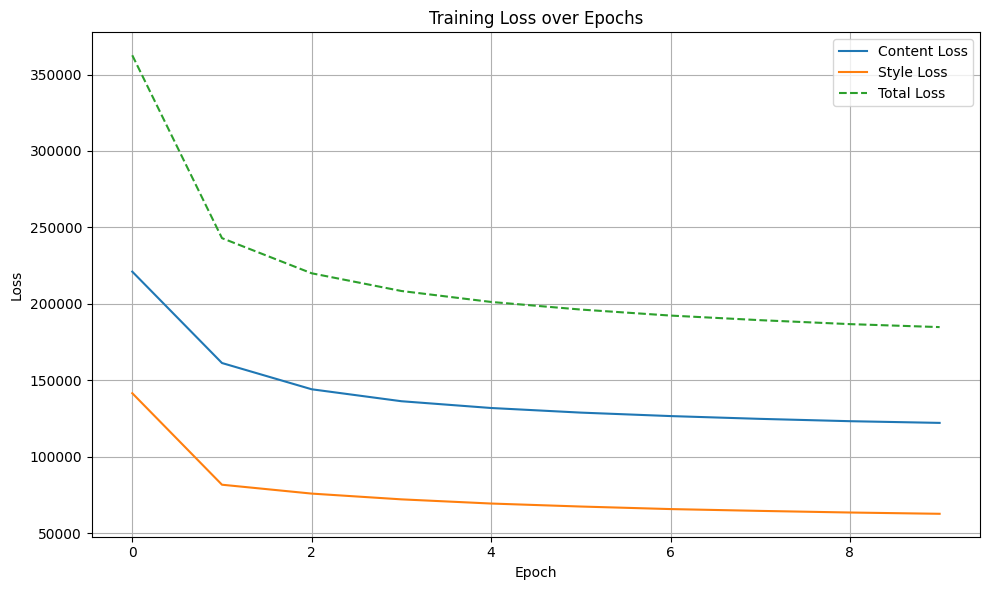

In [ ]:
# --- Execution ---

#  REQUIRED: Set these to match where your content images and style image are stored in Google Drive.

# Path to your training images (e.g., COCO subset or personal photos)
dataset_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/content-images"

# Path to your style image (e.g., a painting like 'Starry Night' or 'Nighthawks')
style_image_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/style-images/Nighthawks_EdwardHopper.jpg"

# Path where you want to save the trained model
model_output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"

# You can optionally adjust training hyperparameters here
content_losses, style_losses, total_losses = train_style_transfer(
    dataset_path,
    style_image_path,
    model_output_path,
    epochs=10,             # Try reducing this to 2–3 if testing setup
    batch_size=4,
    image_size=256,
    content_weight=5e4,
    style_weight=1e10,
    lr=1e-3
)

# Visualize training loss curves
plot_losses(content_losses, style_losses, total_losses)

In [5]:
def stylize_and_compare(model_path, content_image_path, output_path, image_scale=1.0):
    transformer = TransformerNet()
    state_dict = torch.load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

    # Clean deprecated keys
    for k in list(state_dict.keys()):
        if "running_mean" in k or "running_var" in k:
            del state_dict[k]
    transformer.load_state_dict(state_dict)
    transformer.eval()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transformer = transformer.to(device)

    # Preprocess content image
    content_image = load_image(content_image_path, scale=image_scale)
    content_tensor = transforms.ToTensor()(content_image).unsqueeze(0).mul(255).to(device)

    with torch.no_grad():
        output_tensor = transformer(content_tensor).cpu()

    # Convert tensors to images
    output_img = output_tensor.squeeze().clamp(0, 255).numpy()
    output_img = output_img.transpose(1, 2, 0).astype("uint8")

    # Display
    plt.figure(figsize=(12, 6))

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(content_image)
    plt.title("Original Content")
    plt.axis("off")

    # Stylized
    plt.subplot(1, 2, 2)
    plt.imshow(output_img)
    plt.title("Stylized Output")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Save stylized image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    Image.fromarray(output_img).save(output_path)
    print(f"Saved stylized image at: {output_path}")


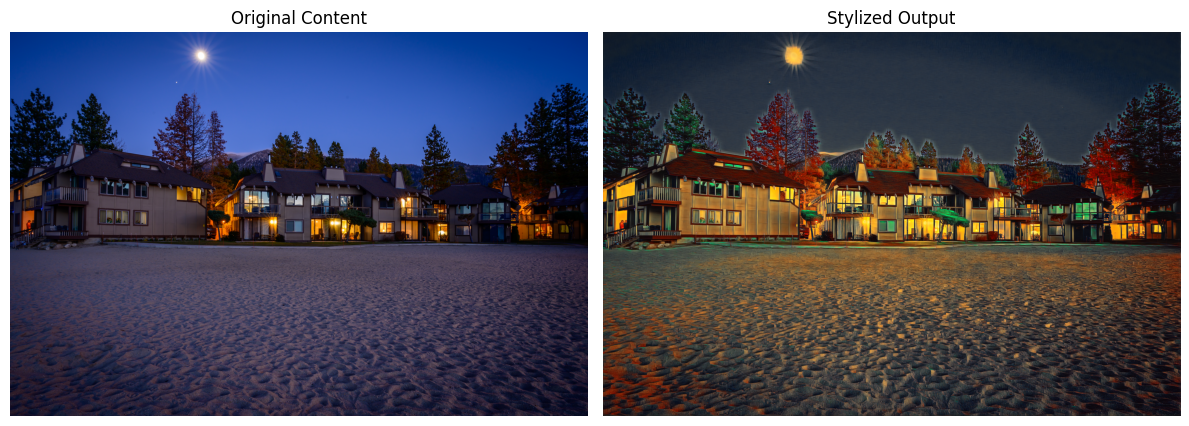

Saved stylized image at: /content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_tahoe.jpg


In [ ]:
# === APPLY STYLE TO A NEW IMAGE ===
# This cell takes a trained model and applies it to a content image to produce a stylized result.

# REQUIRED: Set these to match your input image, model, and desired output location

# Path to the content image you want to stylize
content_image_path =  "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/input_images/ACP_5369.jpg"

# Path to the trained model (.pth) file
model_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"

# Path to save the stylized output image
output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_tahoe.jpg"

# Run stylization
stylize_and_compare(model_path, content_image_path, output_path)

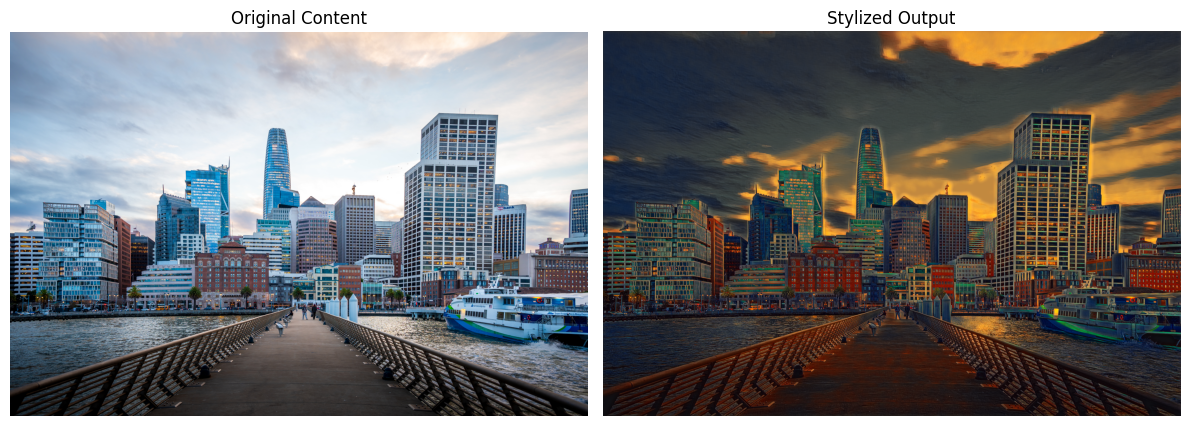

Saved stylized image at: /content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_SFO_embarcedero2.jpg


In [7]:
content_image_path =  "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/input_images/ACP_7613.jpg"
model_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"
output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_SFO_embarcedero2.jpg"

stylize_and_compare(model_path, content_image_path, output_path)

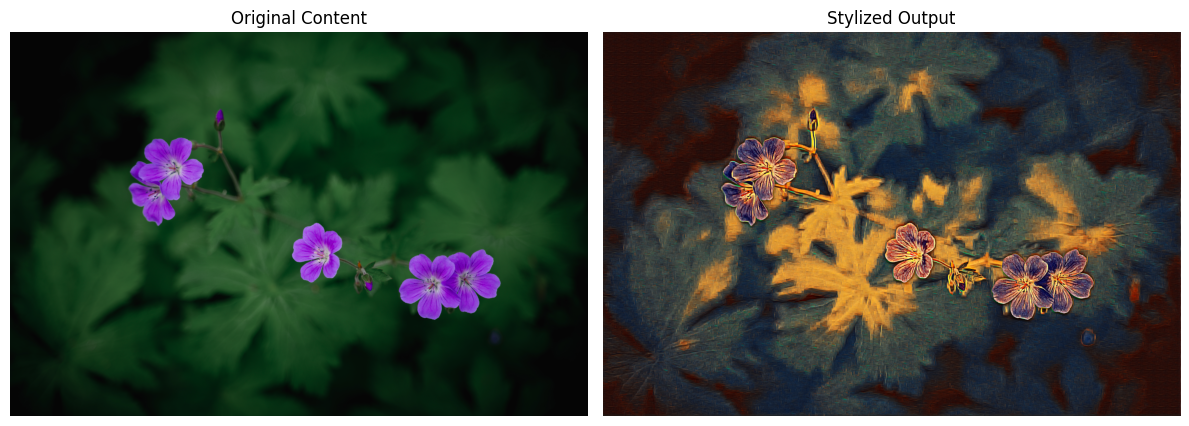

Saved stylized image at: /content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_flower_3.jpg


In [8]:
content_image_path =  "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/input_images/ACP_2899.jpg"
model_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"
output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_flower_3.jpg"

stylize_and_compare(model_path, content_image_path, output_path)

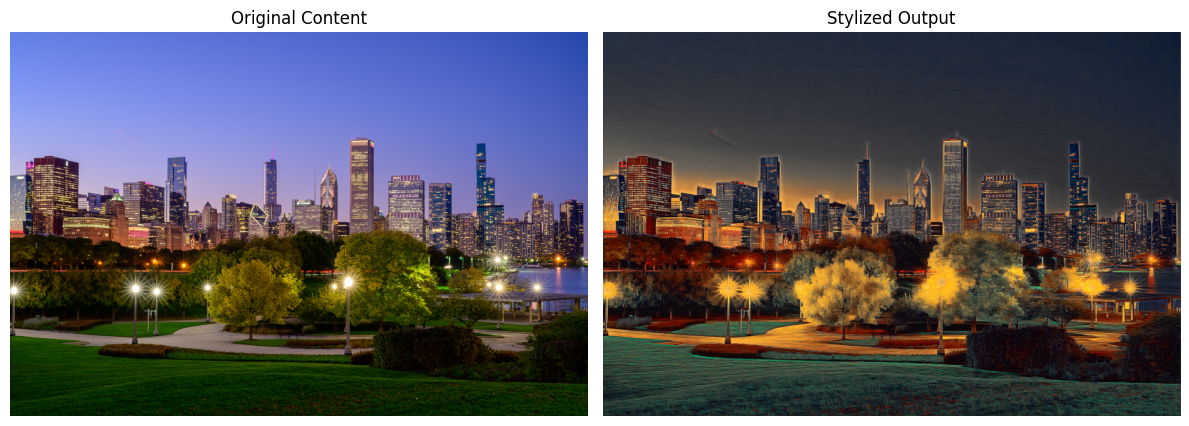

Saved stylized image at: /content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_chicago.jpg


In [10]:
content_image_path =  "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/input_images/ACP_4979-Enhanced-NR.jpg"
model_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"
output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_chicago.jpg"

stylize_and_compare(model_path, content_image_path, output_path)

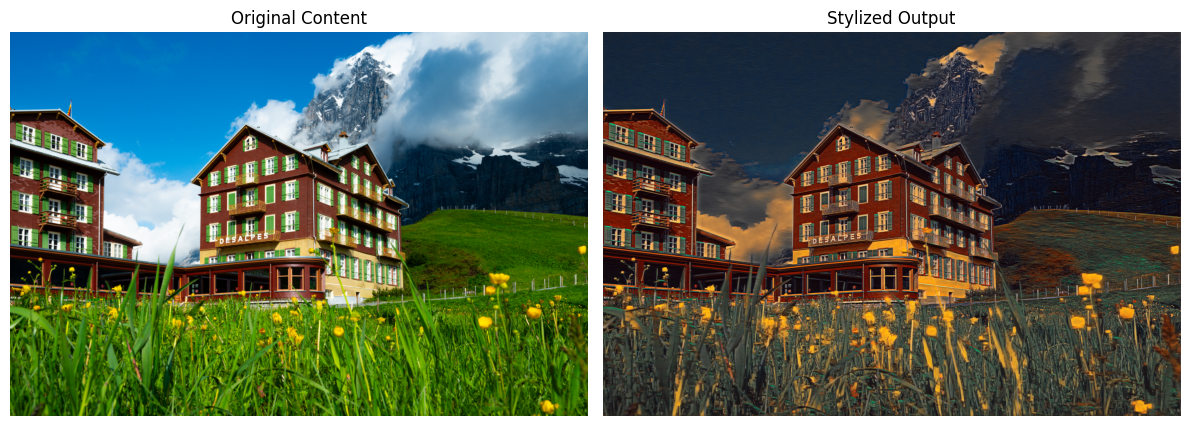

Saved stylized image at: /content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_SFO_switzerland.jpg


In [9]:
content_image_path =  "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/input_images/ACP_4371.jpg"
model_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"
output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_SFO_switzerland.jpg"

stylize_and_compare(model_path, content_image_path, output_path)

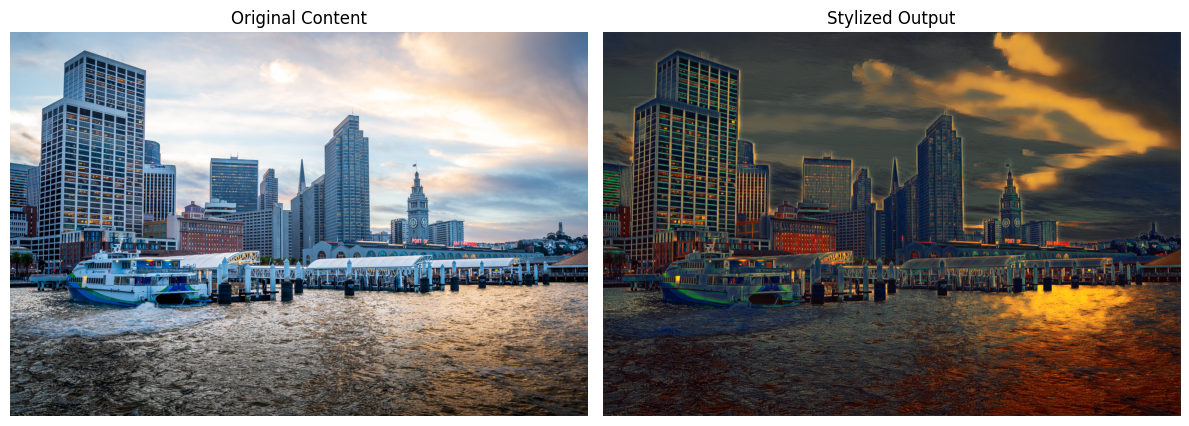

Saved stylized image at: /content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_SFO_switzerland.jpg


In [11]:
content_image_path =  "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/input_images/ACP_7612.jpg"
model_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/data/models/EdHopper_1.pth"
output_path = "/content/drive/MyDrive/collab_notebooks/fast_transfer_project/output/stylized_EdHopper_SFO_switzerland.jpg"

stylize_and_compare(model_path, content_image_path, output_path)